In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
### Set time from to a certain number of years
years = 15

end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days = 365*years)

### Create a list of tickers
tickers = ['SPY','BND','GLD','QQQ','VTI']

In [3]:
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    adj_close_df[ticker] = data['Adj Close']

print(adj_close_df)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2009-08-24   77.866264  51.147942   92.339996   35.170296   39.509953
2009-08-25   78.017532  51.232536   92.760002   35.275166   39.585926
2009-08-26   78.025070  51.265141   92.790001   35.214005   39.555542
2009-08-27   78.199051  51.206516   93.190002   35.301380   39.692310
2009-08-28   78.183907  51.310661   93.870003   35.336315   39.661903
...                ...        ...         ...         ...         ...
2024-08-12  533.270020  73.980003  228.410004  451.380005  262.750000
2024-08-13  542.039978  74.260002  228.059998  462.579987  267.119995
2024-08-14  543.750000  74.400002  226.199997  462.730011  267.880005
2024-08-15  553.070007  74.089996  226.910004  474.420013  272.519989
2024-08-16  554.309998  74.250000  231.990005  475.029999  273.170013

[3771 rows x 5 columns]


In [5]:
adj_close_df.to_csv('data/stocks.csv')

In [85]:
analysis_years = 1

start_date = dt.datetime.now() - dt.timedelta(days=analysis_years * 365)


In [18]:
adj_close_df = pd.read_csv('data/stocks.csv', parse_dates=['Date'], index_col='Date')

In [86]:
adj_close_df = adj_close_df[adj_close_df.index > start_date]

In [87]:
adj_close_df.head()

,SPY,BND,GLD,QQQ,VTI
Date,,,,,
2023-08-23,436.918671,68.806702,177.889999,366.580200,216.786240
2023-08-24,430.863342,68.642548,177.850006,358.744293,213.880112
2023-08-25,433.900879,68.642548,177.619995,361.525055,215.338089
2023-08-28,436.652405,68.768097,178.130005,364.246307,216.717270
2023-08-29,442.964081,69.192940,179.869995,372.201416,219.869659


In [88]:
print(adj_close_df.pct_change())

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2023-08-23       NaN       NaN       NaN       NaN       NaN
2023-08-24 -0.013859 -0.002386 -0.000225 -0.021376 -0.013405
2023-08-25  0.007050  0.000000 -0.001293  0.007751  0.006817
2023-08-28  0.006341  0.001829  0.002871  0.007527  0.006405
2023-08-29  0.014455  0.006178  0.009768  0.021840  0.014546
...              ...       ...       ...       ...       ...
2024-08-12  0.000525  0.001760  0.017145  0.002154 -0.000647
2024-08-13  0.016446  0.003785 -0.001532  0.024813  0.016632
2024-08-14  0.003155  0.001885 -0.008156  0.000324  0.002845
2024-08-15  0.017140 -0.004167  0.003139  0.025263  0.017321
2024-08-16  0.002242  0.002160  0.022388  0.001286  0.002385

[248 rows x 5 columns]


In [89]:
adj_close_df/adj_close_df.shift(1) -1

,SPY,BND,GLD,QQQ,VTI
Date,,,,,
2023-08-23,NaN,NaN,NaN,NaN,NaN
2023-08-24,-0.013859,-0.002386,-0.000225,-0.021376,-0.013405
2023-08-25,0.007050,0.000000,-0.001293,0.007751,0.006817
2023-08-28,0.006341,0.001829,0.002871,0.007527,0.006405
2023-08-29,0.014455,0.006178,0.009768,0.021840,0.014546
...,...,...,...,...,...
2024-08-12,0.000525,0.001760,0.017145,0.002154,-0.000647
2024-08-13,0.016446,0.003785,-0.001532,0.024813,0.016632
2024-08-14,0.003155,0.001885,-0.008156,0.000324,0.002845


In [90]:
# log_returns = np.log(adj_close_df/adj_close_df.shift(1))

log_returns = np.log(1 + adj_close_df.pct_change())

log_returns.dropna(inplace=True)

print(log_returns.head())


                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2023-08-24 -0.013956 -0.002389 -0.000225 -0.021607 -0.013496
2023-08-25  0.007025  0.000000 -0.001294  0.007721  0.006794
2023-08-28  0.006321  0.001827  0.002867  0.007499  0.006384
2023-08-29  0.014351  0.006159  0.009721  0.021605  0.014441
2023-08-30  0.004110 -0.000419  0.002499  0.005561  0.004426


<Axes: title={'center': 'Log Return'}, xlabel='Date'>

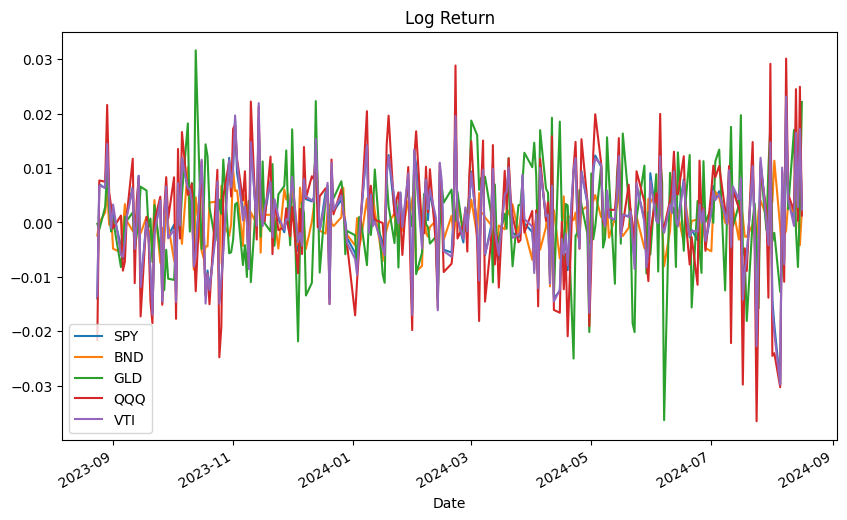

In [91]:
log_returns.plot(title="Log Return", figsize=(10,6))

In [92]:
cumulative_log_returns = log_returns.cumsum()
print(cumulative_log_returns.head())

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2023-08-24 -0.013956 -0.002389 -0.000225 -0.021607 -0.013496
2023-08-25 -0.006931 -0.002389 -0.001519 -0.013886 -0.006702
2023-08-28 -0.000610 -0.000561  0.001348 -0.006387 -0.000318
2023-08-29  0.013742  0.005598  0.011069  0.015218  0.014123
2023-08-30  0.017852  0.005179  0.013568  0.020779  0.018549


<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

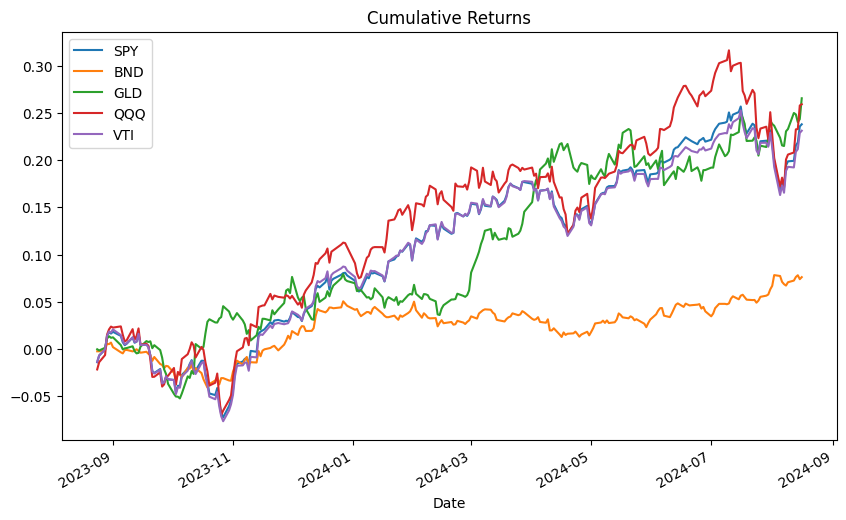

In [93]:
cumulative_log_returns.plot(title="Cumulative Returns", figsize=(10, 6))

In [94]:
normalized_log_return = log_returns / log_returns.iloc[0]
print(normalized_log_return)

                 SPY       BND        GLD       QQQ       VTI
Date                                                         
2023-08-24  1.000000  1.000000   1.000000  1.000000  1.000000
2023-08-25 -0.503375 -0.000000   5.755609 -0.357353 -0.503378
2023-08-28 -0.452945 -0.765041 -12.752035 -0.347054 -0.473046
2023-08-29 -1.028311 -2.578480 -43.232746 -0.999879 -1.070031
2023-08-30 -0.294516  0.175316 -11.113183 -0.257378 -0.327939
...              ...       ...        ...       ...       ...
2024-08-12 -0.037636 -0.736356 -75.604571 -0.099562  0.047928
2024-08-13 -1.168798 -1.581546   6.820388 -1.134326 -1.222197
2024-08-14 -0.225695 -0.788538  36.421400 -0.015007 -0.210516
2024-08-15 -1.217747  1.748087 -13.938139 -1.154660 -1.272423
2024-08-16 -0.160468 -0.903155 -98.471184 -0.059467 -0.176524

[247 rows x 5 columns]


<Axes: title={'center': 'Normalized Returns'}, xlabel='Date'>

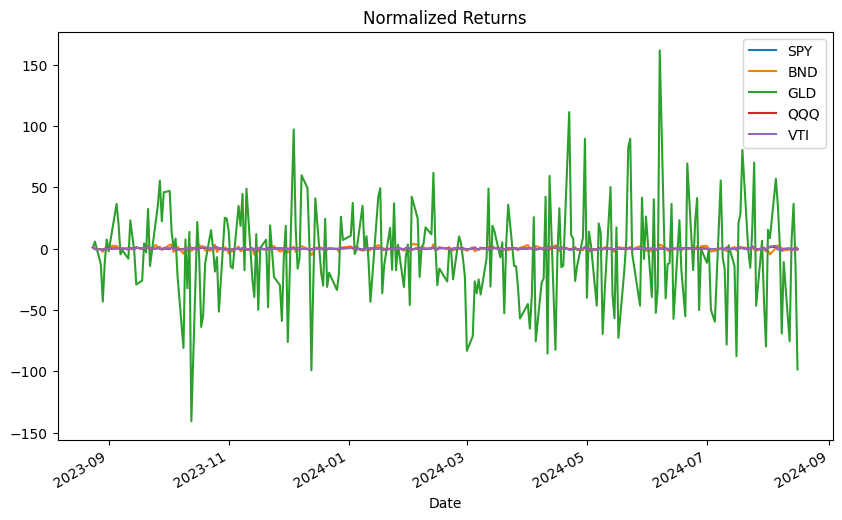

In [95]:
normalized_log_return.plot(title="Normalized Returns", figsize=(10, 10))

### Worst case scenario

Z-Score calculation 2 Std 

In [66]:
def z_score(x):
    return (x - x.mean()) / x.std()

In [64]:
log_returns.describe()

,SPY,BND,GLD,QQQ,VTI
count,3770.000000,3770.000000,3770.000000,3770.000000,3770.000000
mean,0.000521,0.000099,0.000244,0.000690,0.000513
std,0.010814,0.003036,0.009849,0.012880,0.011085
min,-0.115887,-0.055919,-0.091905,-0.127593,-0.120822
25%,-0.003749,-0.001342,-0.004810,-0.004747,-0.003989
50%,0.000701,0.000236,0.000479,0.001197,0.000797
75%,0.005787,0.001647,0.005500,0.007262,0.005906
max,0.086731,0.041335,0.047874,0.081309,0.090661


In [77]:
columns = list(log_returns.columns)

for col in columns:
    col_zscore = col + '_zscore'
    log_returns[col_zscore] = (log_returns[col] - log_returns[col].mean()) / log_returns[col].std(ddof=0)

print(log_returns.head())

                 SPY       BND       GLD       QQQ       VTI  SPY_zscore  \
Date                                                                       
2009-08-25  0.001941  0.001653  0.004538  0.002977  0.001921    0.131346   
2009-08-26  0.000097  0.000636  0.000323 -0.001735 -0.000768   -0.039215   
2009-08-27  0.002227 -0.001144  0.004302  0.002478  0.003452    0.157848   
2009-08-28 -0.000194  0.002032  0.007270  0.000989 -0.000766   -0.066064   
2009-08-31 -0.008939  0.001902 -0.005020 -0.010189 -0.009624   -0.874890   

            BND_zscore  GLD_zscore  QQQ_zscore  VTI_zscore  SPY_zscore_zscore  \
Date                                                                            
2009-08-25    0.511859    0.436036    0.177571    0.127054           0.131346   
2009-08-26    0.177022    0.008022   -0.188363   -0.115554          -0.039215   
2009-08-27   -0.409525    0.412010    0.138813    0.265155           0.157848   
2009-08-28    0.636786    0.713499    0.023189   -0.115420    

In [74]:
z_score_columns = ['_'.join([c, 'zscore']) for c in columns]
z_score_columns

['SPY_zscore', 'BND_zscore', 'GLD_zscore', 'QQQ_zscore', 'VTI_zscore']

In [76]:
query = ' | '.join([f'{c} > {2}' for c in z_score_columns])
query

'SPY_zscore > 2 | BND_zscore > 2 | GLD_zscore > 2 | QQQ_zscore > 2 | VTI_zscore > 2'

In [80]:
worst_case_scanario = log_returns.query(query)
print(worst_case_scanario.head())

                 SPY       BND       GLD       QQQ       VTI  SPY_zscore  \
Date                                                                       
2009-09-02 -0.003799  0.002155  0.024095 -0.000764 -0.004162   -0.399527   
2009-10-06  0.014223  0.001132  0.024346  0.017559  0.014704    1.267256   
2009-11-03  0.003158 -0.001770  0.023859  0.003156  0.004563    0.243950   
2009-11-09  0.022520  0.002021  0.007049  0.021136  0.022181    2.034689   
2010-01-04  0.016818  0.001145  0.022939  0.014538  0.016538    1.507254   

            BND_zscore  GLD_zscore  QQQ_zscore  VTI_zscore  SPY_zscore_zscore  \
Date                                                                            
2009-09-02    0.677496    2.422039   -0.112962   -0.421812          -0.399527   
2009-10-06    0.340397    2.447483    1.309827    1.280374           1.267256   
2009-11-03   -0.615802    2.398105    0.191416    0.365472           0.243950   
2009-11-09    0.633283    0.691062    1.587598    1.954987    